In [15]:
import torch
import numpy as np
from datautils import load_npy_safely

In [ ]:
dataset = 'denoise'

if dataset == 'denoise':
    TRAIN_CLEAN = "data/EOG_EEG_train_output.npy"
    TRAIN_CONT  = "data/EOG_EEG_train_input.npy"
    TEST_CLEAN  = "data/EOG_EEG_test_output.npy"
    TEST_CONT   = "data/EOG_EEG_test_input.npy"
elif dataset == 'bci':
    # only for testing
    TRAIN_CLEAN = 'data_bci/eegs_BCI_mini.npy'
    TRAIN_CONT  = 'data_bci/conts_BCI_mini.npy'
    TEST_CLEAN = TRAIN_CLEAN
    TEST_CONT = TRAIN_CONT

FS = 256
EPOCH_S = 2.0
N_SAMPLES = int(FS * EPOCH_S)

np.set_printoptions(suppress=True, floatmode="fixed", linewidth=120)

# if gpu == 'cpu':
#     device = "cpu"
# else:
#     device = f"cuda:{gpu}" if torch.cuda.is_available() else "cpu"
# print(f'Using device: {device}')

S_tr = load_npy_safely(TRAIN_CLEAN, N_SAMPLES=N_SAMPLES)
X_tr = load_npy_safely(TRAIN_CONT, N_SAMPLES=N_SAMPLES)
S_te = load_npy_safely(TEST_CLEAN, N_SAMPLES=N_SAMPLES)
X_te = load_npy_safely(TEST_CONT, N_SAMPLES=N_SAMPLES)


In [17]:
X_tr.shape

(30000, 512)

In [ ]:
%config InlineBackend.figure_format = 'retina'

4495
Number of parameters in model: 629


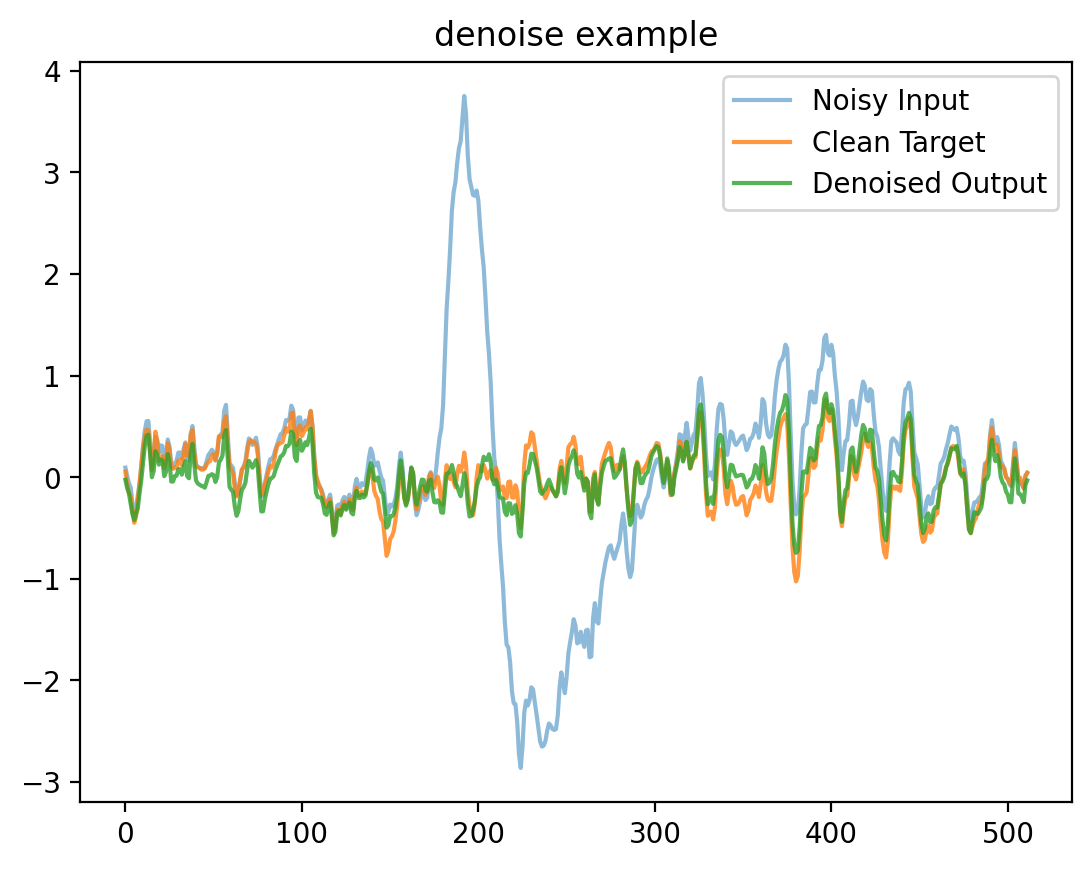

In [19]:
ridx = np.random.randint(0, X_tr.shape[0])
print(ridx)
testsample = X_tr[ridx, :]
filename = 'models_folder_new/best_conv5SingleHeadNet_final_5conv_ch4_grp4_scale1_mse_only_denoise_epoch_50_weights_629_params.pth'
model = torch.load(filename, weights_only=False, map_location='cpu')
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Number of parameters in model: {num_params}')
model.eval()
with torch.no_grad():
    est = model(torch.tensor(testsample, dtype=torch.float32).unsqueeze(0).unsqueeze(0))[0]
    est_np = est.squeeze().cpu().numpy()
import matplotlib.pyplot as plt
plt.figure()
plt.plot(testsample, label='Noisy Input', alpha=0.5)
plt.plot(S_tr[ridx, :], label='Clean Target', alpha=0.8)
plt.plot(est_np, label='Denoised Output', alpha=0.8)
plt.legend()
plt.title(f'{dataset} example')
plt.show()